In the calculations of thermodynamic properties, only only the accuracy but also the precision is our concern. Bennett Acceptance Ration (BAR), which was proposed by Bennett in 1976, is a method that yield the free energy difference between two states with minimal variance. Not like in thermodynamic perturbation, BAR requires simulations for both states. Starting from the definition of free energy difference
\begin{align}
\Delta A&=\ln{\frac{Q_0}{Q_1}}\notag\\
      &=\ln{\frac{Q_0}{Q_1}\frac{\int W\exp{(-U_0-U_1)}d\mathbf{q}}{\int W\exp{(-U_0-U_1)}d\mathbf{q}}}\notag\\
      &=\ln{\left\{\frac{\int W\exp{(-U_0)}\exp{(-U_1)}d\mathbf{q}}{Q_1}\cdot\frac{Q_0}{\int W\exp{(-U_1)}\exp{(-U_0)}d\mathbf{q}}\right\}}\notag\\
      &=\ln{\frac{\left<W\exp{(-U_0)}\right>_1}{\left<W\exp{(-U_1)}\right>_0}},
\end{align}
where $W$ is an arbitrary normal weighting function. Optimization of the free energy estimate is most easily carried out in the limit of large sample sizes. Let the available data consist of $n_0$ statistically independent configurations from the $U_0$ ensemble and $n_1$ from the $U_1$ ensemble. Let the data be used in the above equation to obtain a finite-sample estimate of the reduced free energy difference $\Delta A$. Using the error propagation equation
$$
\operatorname{Var}[y(x_1,x_2)]=\left(\frac{\partial y}{\partial x_1}\right)^2 \operatorname{Var}(x_1) + \left(\frac{\partial y}{\partial x_2}\right)^2 \operatorname{Var}(x_2),
$$
by assuming that $x_1$ and $x_2$ are independent, we have the variance of $\Delta A$
\begin{align*}
\operatorname{Var}(\Delta A)&=\left(\frac{\partial \Delta A}{\partial Q_0}\right)^2 \operatorname{Var}(Q_0)+\left(\frac{\partial \Delta A}{\partial Q_1}\right)^2 \operatorname{Var}(Q_1)\\
         &=\left(\frac{1}{Q_0}\right)^2 \operatorname{Var}(Q_0)+\left(-\frac{1}{Q_1}\right)^2 \operatorname{Var}(Q_1)\\
         &=\left(\frac{1}{Q_0}\right)^2 \operatorname{Var}(Q_0)+\left(\frac{1}{Q_1}\right)^2 \operatorname{Var}(Q_1).
\end{align*}
With the definition of variance $\operatorname{Var}(X)=\left<X^2\right>-\left<X\right>^2$, we have
\begin{align*}
\operatorname{Var}(Q_0)&=\operatorname{Var}\left(\left<W\exp{(-U_0)}\right>_1\right)\\
     &=\operatorname{Var}\left(\frac{1}{n_1}\sum_{i=1}^{n_1}W_i\exp{(-U_0(i))}\right)\\
     &=\sum_{i=1}^{n_1}\left(\frac{1}{n_1}\right)^2 \operatorname{Var}\left\{W_i\exp{\left[-U_0(i)\right]}\right\}\\
     &=\frac{1}{n_1}\operatorname{Var}\left\{W_i\exp{\left[-U_0(i)\right]}\right\}\\
     &=\frac{1}{n_1}\left\{\left<\left(W\exp{(-U_0)}\right)^2\right>_1-\left[\left<W\exp{(-U_0)}\right>_1\right]^2\right\}\\
     &=\frac{1}{n_1}\left\{\left<W^2\exp{(-2U_0)}\right>_1-\left[\left<W\exp{(-U_0)}\right>_1\right]^2\right\}
\end{align*}
With sufficiently large sample sizes, the error of this estimate will be nearly Gaussian, and its expected square is exactly the variance of $\Delta A$
\begin{align*}
\operatorname{Var}\left(\Delta A_{est}-\Delta A\right)&\approx\frac{\left<W^2\exp{(-2U_1)}\right>_0}{n_0\left[\left<W\exp{\left(-U_1\right)}\right>_0\right]^2}+\frac{\left<W^2\exp{(-2U_0)}\right>_1}{n_1\left[\left<W\exp{\left(-U_0\right)}\right>_1\right]^2}-\frac{1}{n_0}-\frac{1}{n_1}\\
&=\frac{\int \left[(Q_0/n_0)\exp{(-U_1)+(Q_1/n_1)\exp{(-U_0)}}\right]W^2\exp{(-U_0-U_1)} d\mathbf{q}}{\left[\int W\exp{(-U_0-U_1)}d\mathbf{q}\right]^2}-\frac{1}{n_0}-\frac{1}{n_1}.
\end{align*}
To minimize it with respect to $W$, we find
$$
W=\mathit{const}\times\left(\frac{Q_0}{n_0}\exp{(-U_1)}+\frac{Q_1}{n_1}\exp{(-U_0)}\right)^{-1}.
$$

Substituting this into the definition of $\Delta A$ (please let me when equation numbering and references in Jupyter is available) yields
$$
\Delta A=\ln{\frac{Q_0}{Q_1}}=\ln{\frac{\left<f(U_0-U_1+C)\right>_1}{\left<f(U_1-U_0-C)\right>_0}}+C
$$
where
$$
C=\Delta A+\ln{\frac{n_1}{n_0}},
$$
and $f$ denotes the Fermi function
$$
f(x)=\frac{1}{1+\exp{(x)}}.
$$
Because $C$ and $\Delta A$ depend on each other, they must be solved iteratively.

In this script, we are going to calculate the free energy difference between two states.
State 0 has a Hamiltonian $H_0=(x+1.5)^2$ in one-dimensional space, and state 1 has a Hamiltonian $H_1=0.5(x-1.5)^2$. The free energy difference between these two states is
\begin{align*}
\Delta A&=\ln{\frac{\int \exp{(-H_0(\mathbf{x}))}d\mathbf{x}}{\int \exp{(-H_1(\mathbf{x}))}d\mathbf{x}}}\\
     &=\ln{\frac{\int \exp{(-(x+1.5)^2)}d\mathbf{x}}{\int \exp{(-0.5\times(x-1.5)^2)}d\mathbf{x}}}\\
     &=\ln{\frac{\sqrt{2\pi\times 0.5}}{\sqrt{2\pi\times 1}}}\\
     &=-0.35
\end{align*}

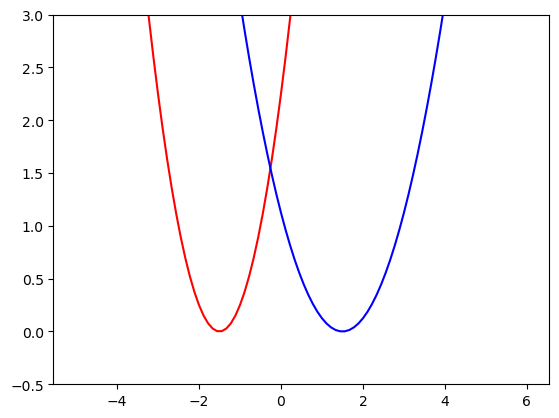

In [1]:
%matplotlib inline
from math import *
import numpy as np
import random
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random
np.set_printoptions(precision=3)
def u0(x):
    return (x+1.5)**2
def u1(x):
    return 0.5*(x-1.5)**2
x=np.linspace(-5,6,100)
y0=u0(x)
y1=u1(x)
plt.ylim(-.5, 3)
plt.plot(x,y0,'r',x,y1,'b')
plt.show()

Because the barrier is much larger than 1 in a unit of kT, it is difficult for TP to find the converged correct answer. Next we will use BAR to get the free energy difference.

Now we define a Monte Carlo (MC) propagator for this simulation. 
In the MC simulation, the transition between states must satisfy the detailed balance, i.e.
$$\rho(x_i)P(x_i,x_j)=\rho(x_j)P(x_j,x_i),$$
where $\rho(x_i)$ and $P(x_i,x_j)$ are the probability of the microstate $x_i$ and the transition probability from $x_i$ to $x_j$, 
respectively.
Suppose at $t_0$ the system is located at microstate $x_0$ with energy u(x_0). We make a random trial move to $x_1^t$ with energy 
$u(x_1^t)$.

if $u(x_1^t)<u(x_0)$

  {
  $x_1=x_1^t$
  }
  
else

  {
   generate a random number $s$ evenly distributed in [0,1]
  
   if $s<e^{-[u(x_1^t)-u(x_0)]}$
  
   {
    $x_1=x_1^t$
    }
    
   else
  
   {
    $x_1=x_0$
   }
  }

In [2]:
def MCpropagator(x0,dx,N,dN,u):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count <N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.0,1.0)
            if rnd < 0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = u(xtrial) - u(xcurrent)
            if deltau < 0.0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count]=xcurrent
        count = count + 1
    return x, count

Number of samples generated for H0:    10000
Number of samples generated for H1:    10000
The distribution of the samples looks like:


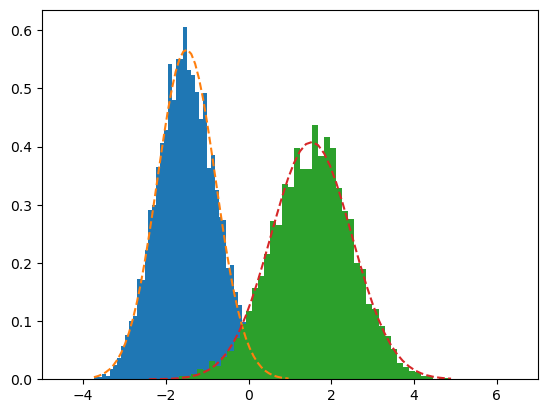

In [3]:
dx = 0.01
dN = 1600
N0 = 10000
x_init0 = -1.5
x0 = np.empty(N0)
x0, count0 = MCpropagator(x_init0,dx,N0,dN,u0)
print('Number of samples generated for H0: %8d' %count0)
prob0, bins0, patches0 = plt.hist(x0, bins=50, density=True)
mean0 = np.mean(x0)
variance0 = np.var(x0)
sigma0 = np.sqrt(variance0)
npdf0 = scipy.stats.norm.pdf(bins0,mean0,sigma0)
plt.plot(bins0, npdf0, '--')

N1 = 10000
x_init1 = 1.5
x1 = np.empty(N0)
x1, count1 = MCpropagator(x_init1,dx,N1,dN,u1)
print('Number of samples generated for H1: %8d' %count1)

prob1, bins1, patches1 = plt.hist(x1, bins=50, density=True)
mean1 = np.mean(x1)
variance1 = np.var(x1)
sigma1 = np.sqrt(variance1)
npdf1 = scipy.stats.norm.pdf(bins1,mean1,sigma1)
plt.plot(bins1, npdf1, '--')

print('The distribution of the samples looks like:')
plt.xlim(-5,7)
plt.show()

With these microstates sampled under $H_0$ and $H_1$, we calculate the free energy difference.

In [4]:
def fermi(x):
    return 1.0/(1+np.exp(x))

In [5]:
def BAR(u00,u11,u01,u10,count0,count1,deltaA=0.0,maxcycle=100,converg=1.E-4):
    icycle = 1
    while icycle <maxcycle:
        deltaA0=deltaA
        c=deltaA+log(float(count1)/count0)
        f0=fermi(u01-u00-c)
        f1=fermi(u10-u11+c)
        f0mean = np.mean(f0)
        f1mean = np.mean(f1)
        deltaA=log(f1mean/f0mean)+c
        #print('Cycle %d: Delta A=%5.2f' %(icycle, deltaA))
        if np.abs(deltaA0-deltaA)<converg:
            #print("Convergence has reached")
            return deltaA
        icycle += 1
    print("max cyclc reached. Return with nonconverged result")
    return deltaA

In [6]:
def bootstrap(u00,u11,u01,u10,count0,count1,nbs):
    bsu00=np.empty(count0)
    bsu01=np.empty(count0)
    bsu10=np.empty(count1)
    bsu11=np.empty(count1)
    deltaAs=np.empty(nbs)
    ibs = 0
    while ibs < nbs:
        print('Bootstrapping iteration %d/%d' % (ibs+1,nbs))
        irand = 0
        while irand < count0:
            idx = random.randint(0,count0-1)
            #print('%d, %d' % (irand,idx))
            bsu00[irand] = u00[idx]
            bsu01[irand] = u01[idx]
            irand += 1
        irand = 0
        while irand < count1:
            idx = random.randint(0,count1-1)
            #print('%d, %d' % (irand,idx))
            bsu10[irand] = u10[idx]
            bsu11[irand] = u11[idx]
            irand += 1
        deltaAs[ibs]=BAR(bsu00,bsu11,bsu01,bsu10,count0,count1,0.0,100)
        print('The free energy difference from a BAR calculation is %8.2f ' % (deltaAs[ibs]))
        ibs += 1
    deltaA=np.mean(deltaAs)
    vardeltaA=np.var(deltaAs)
    return deltaA,vardeltaA

In [7]:
def TP(u1,u0):
    N=u1.size
    edu = np.zeros(N)
    edu = np.exp(-(u1-u0))
    S = np.mean(edu)
    varS = np.var(edu)/N
    deltaA = -np.log(S)
    varA = varS/S**2
    return deltaA, varA

The distributions of delta U in forward and backward TP look like:


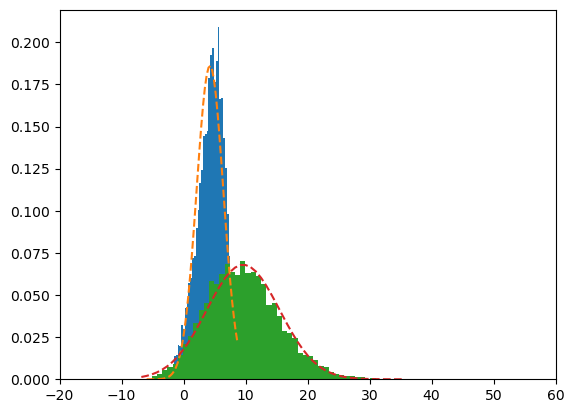

Bootstrapping iteration 1/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 2/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 3/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 4/1000
The free energy difference from a BAR calculation is    -0.35 
Bootstrapping iteration 5/1000
The free energy difference from a BAR calculation is    -0.39 
Bootstrapping iteration 6/1000
The free energy difference from a BAR calculation is    -0.36 
Bootstrapping iteration 7/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 8/1000
The free energy difference from a BAR calculation is    -0.48 
Bootstrapping iteration 9/1000
The free energy difference from a BAR calculation is    -0.48 
Bootstrapping iteration 10/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 11/1000
The free energy difference 

The free energy difference from a BAR calculation is    -0.53 
Bootstrapping iteration 88/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 89/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 90/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 91/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 92/1000
The free energy difference from a BAR calculation is    -0.47 
Bootstrapping iteration 93/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 94/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 95/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 96/1000
The free energy difference from a BAR calculation is    -0.48 
Bootstrapping iteration 97/1000
The free energy difference from a BAR calculation 

The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 180/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 181/1000
The free energy difference from a BAR calculation is    -0.33 
Bootstrapping iteration 182/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 183/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 184/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 185/1000
The free energy difference from a BAR calculation is    -0.39 
Bootstrapping iteration 186/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 187/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 188/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 189/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.34 
Bootstrapping iteration 271/1000
The free energy difference from a BAR calculation is    -0.37 
Bootstrapping iteration 272/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 273/1000
The free energy difference from a BAR calculation is    -0.37 
Bootstrapping iteration 274/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 275/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 276/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 277/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 278/1000
The free energy difference from a BAR calculation is    -0.46 
Bootstrapping iteration 279/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 280/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.50 
Bootstrapping iteration 362/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 363/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 364/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 365/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 366/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 367/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 368/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 369/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 370/1000
The free energy difference from a BAR calculation is    -0.48 
Bootstrapping iteration 371/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.39 
Bootstrapping iteration 456/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 457/1000
The free energy difference from a BAR calculation is    -0.36 
Bootstrapping iteration 458/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 459/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 460/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 461/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 462/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 463/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 464/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 465/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.36 
Bootstrapping iteration 546/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 547/1000
The free energy difference from a BAR calculation is    -0.38 
Bootstrapping iteration 548/1000
The free energy difference from a BAR calculation is    -0.49 
Bootstrapping iteration 549/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 550/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 551/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 552/1000
The free energy difference from a BAR calculation is    -0.50 
Bootstrapping iteration 553/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 554/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 555/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 633/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 634/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 635/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 636/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 637/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 638/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 639/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 640/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 641/1000
The free energy difference from a BAR calculation is    -0.38 
Bootstrapping iteration 642/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.46 
Bootstrapping iteration 724/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 725/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 726/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 727/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 728/1000
The free energy difference from a BAR calculation is    -0.35 
Bootstrapping iteration 729/1000
The free energy difference from a BAR calculation is    -0.38 
Bootstrapping iteration 730/1000
The free energy difference from a BAR calculation is    -0.51 
Bootstrapping iteration 731/1000
The free energy difference from a BAR calculation is    -0.48 
Bootstrapping iteration 732/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 733/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.46 
Bootstrapping iteration 816/1000
The free energy difference from a BAR calculation is    -0.38 
Bootstrapping iteration 817/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 818/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 819/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 820/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 821/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 822/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 823/1000
The free energy difference from a BAR calculation is    -0.41 
Bootstrapping iteration 824/1000
The free energy difference from a BAR calculation is    -0.44 
Bootstrapping iteration 825/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 902/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 903/1000
The free energy difference from a BAR calculation is    -0.37 
Bootstrapping iteration 904/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 905/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 906/1000
The free energy difference from a BAR calculation is    -0.46 
Bootstrapping iteration 907/1000
The free energy difference from a BAR calculation is    -0.40 
Bootstrapping iteration 908/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 909/1000
The free energy difference from a BAR calculation is    -0.43 
Bootstrapping iteration 910/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 911/1000
The free energy difference from a BAR ca

The free energy difference from a BAR calculation is    -0.47 
Bootstrapping iteration 994/1000
The free energy difference from a BAR calculation is    -0.46 
Bootstrapping iteration 995/1000
The free energy difference from a BAR calculation is    -0.42 
Bootstrapping iteration 996/1000
The free energy difference from a BAR calculation is    -0.47 
Bootstrapping iteration 997/1000
The free energy difference from a BAR calculation is    -0.39 
Bootstrapping iteration 998/1000
The free energy difference from a BAR calculation is    -0.48 
Bootstrapping iteration 999/1000
The free energy difference from a BAR calculation is    -0.45 
Bootstrapping iteration 1000/1000
The free energy difference from a BAR calculation is    -0.40 

The free energy difference from a BAR calculation is    -0.42 +-  0.04

The free energy difference from a forward TP calculation is     1.15 +-  0.15
The dissipated work in a forward TP is     3.10
The free energy difference from a backward TP calculation is    -

In [8]:
u00=u0(x0)
u11=u1(x1)
u01=u1(x0)
u10=u0(x1)

du01=u01-u00
probdu01, binsdu01, patchesdu01 = plt.hist(du01, bins=50, density=True)
meandu01 = np.mean(du01)
variancedu01 = np.var(du01)
sigmadu01 = np.sqrt(variancedu01)
npdfdu01 = scipy.stats.norm.pdf(binsdu01,meandu01,sigmadu01)
plt.plot(binsdu01, npdfdu01, '--')

du10=u10-u11
probdu10, binsdu10, patchesdu10 = plt.hist(du10, bins=50, density=True)
meandu10 = np.mean(du10)
variancedu10 = np.var(du10)
sigmadu10 = np.sqrt(variancedu10)
npdfdu10 = scipy.stats.norm.pdf(binsdu10,meandu10,sigmadu10)
plt.plot(binsdu10, npdfdu10, '--')

print('The distributions of delta U in forward and backward TP look like:')
plt.xlim(-20,60)
plt.show()

deltaA=0.0
deltaA,vardeltaA=bootstrap(u00,u11,u01,u10,count0,count1,1000)
print('\nThe free energy difference from a BAR calculation is %8.2f +- %5.2f\n' % (deltaA,sqrt(vardeltaA)))

fTPdA, fTPvardA = TP(u01,u00)
print('The free energy difference from a forward TP calculation is %8.2f +- %5.2f' % (fTPdA, sqrt(fTPvardA)))
feDis=np.mean(du01)-fTPdA
print('The dissipated work in a forward TP is %8.2f' % (feDis))

bTPdA, bTPvardA = TP(u10,u11)
bTPdA = -bTPdA
print('The free energy difference from a backward TP calculation is %8.2f +- %5.2f' % (bTPdA, sqrt(bTPvardA)))
beDis=np.mean(du10)+bTPdA
print('The dissipated work in a backward TP is %8.2f' % (beDis))


avgTPdA=fTPdA*((1/fTPvardA)/(1/fTPvardA+1/bTPvardA)) + bTPdA*((1/bTPvardA)/(1/fTPvardA+1/bTPvardA))
varavgTPdA=1/(1/fTPvardA+1/bTPvardA)
print('The free energy difference from the weighted average of the backward TP and forward TP is %8.2f +- %5.2f' % (avgTPdA, sqrt(varavgTPdA)))

In the following, we will use another sampling method termed stratified sampling. In this method, we first introduce a series of intermediate states with a Hamiltonian $H_\lambda=\lambda H_1+(1-\lambda)H_0,\, \lambda \in (0,1)$. When $\lambda=0,\, H_\lambda=H_0$. And $H_\lambda=H_1$, when $\lambda=1$. The function for $H_\lambda$ is:

In [9]:
def ulmbd(lamb,x):
    return (1-lamb)*u0(x)+lamb*u1(x)

We can plot the potential energy surfaces


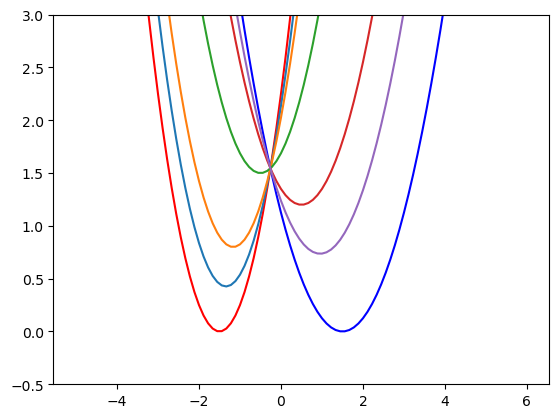

In [10]:
x=np.linspace(-5,6,100)
y0=ulmbd(0.0,x)
y1=ulmbd(0.1,x)
y2=ulmbd(0.2,x)
y5=ulmbd(0.5,x)
y8=ulmbd(0.8,x)
y9=ulmbd(0.9,x)
yN=ulmbd(1.0,x)
plt.ylim(-.5, 3)
plt.plot(x,y0,'r')
plt.plot(x,yN,'b')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y5)
plt.plot(x,y8)
plt.plot(x,y9)
plt.show()

The free energy difference between $H_0$ and $H_1$ can be written as the sum of the free energy difference between each pair of neighboring states, i.e.
$$\Delta A_{0\rightarrow 1}=\sum\limits_{i=0}^{N-1}\Delta A_{\lambda_i\rightarrow \lambda_{i+1}}$$
We keep the total number of samples fixed and evenly distribute the samples to each simulation under $H_\lambda$.

In [11]:
def MCpropagator2(x0,dx,N,dN,ulmbd,lamb):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count < N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.,1.)
            if rnd<0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = ulmbd(lamb,xtrial) - ulmbd(lamb,xcurrent)
            if deltau < 0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count] = xcurrent
        count = count + 1
    return x, count

def TP2(x,ulmbd,lmbd1,lmbd2):
    edu=np.zeros(x.size)
    edu = np.exp(-(ulmbd(lmbd2,x)-ulmbd(lmbd1,x)))
    S = np.mean(edu)
    varS = np.var(edu)/x.size
    deltaA = -np.log(S)
    varA = varS/S**2
    return deltaA, varA

The free energy difference from lambda 0.00 to lambda 0.10 is     0.40 +-  0.01
The free energy difference from lambda 0.10 to lambda 0.20 is     0.35 +-  0.01
The free energy difference from lambda 0.20 to lambda 0.30 is     0.26 +-  0.01
The free energy difference from lambda 0.30 to lambda 0.40 is     0.20 +-  0.01
The free energy difference from lambda 0.40 to lambda 0.50 is     0.24 +-  0.01
The free energy difference from lambda 0.50 to lambda 0.60 is    -0.03 +-  0.01
The free energy difference from lambda 0.60 to lambda 0.70 is    -0.01 +-  0.01
The free energy difference from lambda 0.70 to lambda 0.80 is    -0.21 +-  0.01
The free energy difference from lambda 0.80 to lambda 0.90 is    -0.59 +-  0.02
The free energy difference from lambda 0.90 to lambda 1.00 is    -0.76 +-  0.02

The total free energy difference is    -0.14 +-  0.04


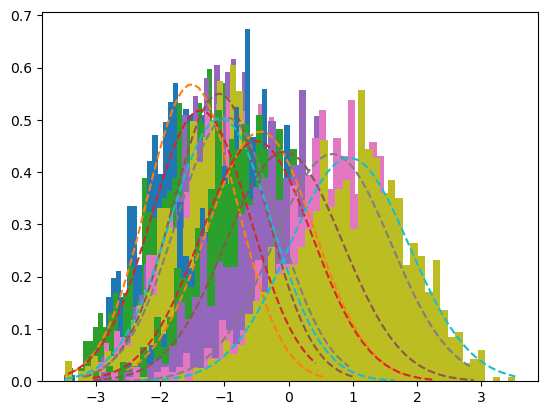

In [12]:
dx = 0.01
N=10000
dlambda = 0.1
lambs = np.arange(0.0,1.,dlambda)
lambs = np.append(lambs,[1.0])
Ns = N//(len(lambs)-1)
deltaA = np.zeros(len(lambs)-1)
varA = np.zeros(len(lambs)-1)
i = 0
for i in range(len(lambs)-1):
    x0 = -1.5 + 3.0*i*dlambda
    x = np.empty(Ns)
    x, count = MCpropagator2(x0,dx,Ns,dN,ulmbd,lambs[i])
#    print('Number of samples generated:%8d for lambda= %5.2f' %(count,lambs[i]))
    prob, bins, patches = plt.hist(x, bins=50, density=True)
    mean = np.mean(x)
    variance = np.var(x)
    sigma = np.sqrt(variance)
    npdf = scipy.stats.norm.pdf(bins,mean,sigma)
    plt.plot(bins, npdf, '--')
    deltaA[i], varA[i] = TP2(x,ulmbd,lambs[i],lambs[i+1])
    print('The free energy difference from lambda %4.2f to lambda %4.2f is %8.2f +- %5.2f' % (lambs[i],lambs[i+1],deltaA[i], np.sqrt(varA[i])))

print('')
print('The total free energy difference is %8.2f +- %5.2f' %(np.sum(deltaA),np.sqrt(np.sum(varA))))
plt.show()